<a href="https://colab.research.google.com/github/D3mianGianoz/Machine-Learning/blob/master/Distance%20Based%20Models/clustering_copy_for_students_aa_20_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercizes on clustering

Here you can find a program to read a data file in csv format. 
The data file has the following heading:
    number of samples, number of features
    list of the names of the features (separated by comma)
The remaining lines contain an example per row.
For each row there is a list of real numbers (commas separated) which are the feature values.   

In [142]:
# All imports are grupped here
import numpy as np
import csv
import sys

from os.path import join


# silhouette and metrics
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.pairwise import euclidean_distances

# clustering 
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler

# colors and plot
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [138]:

# this function reads the data file, loads the configuration attributes specifiefd in the heading
# (numer of examples and features), the list of feature names
# and loads the data in a matrix named data    
def load_data(file_path, file_name):
   with open(join(file_path, file_name)) as csv_file:
       data_file = csv.reader(csv_file,delimiter=',')
       temp1 = next(data_file)
       n_samples = int(temp1[0])
       print("n_samples=")
       print(n_samples)
       n_features = int(temp1[1])
       temp2 = next(data_file)
       feature_names = np.array(temp2[:n_features])

       data_list = [iter for iter in data_file]
               
       data = np.asarray(data_list, dtype=np.float64)                  
       
   return(data,feature_names,n_samples,n_features)

# The main program reads the input file containing the dataset
# file_path is the file path where the file with the data to be read are located
# we assume the file contains an example per line
# each example is a list of real values separated by a comma (csv format)
# The first line of the file contains the heading with:
# N_samples,n_features,
# The second line contains the feature names separated by a comma     

file_path=""
#file_path="Datasets for clustering/"
# all the three datasets contain data points on (x,y) 

file_name1="3-clusters.csv"
file_name2="dataset-DBSCAN.csv"     
file_name3="CURE-complete.csv"    
data1,feature_names1,n_samples1,n_features1 = load_data(file_path, file_name1)
data2,feature_names2,n_samples2,n_features2 = load_data(file_path, file_name2)
data3,feature_names3,n_samples3,n_features3 = load_data(file_path, file_name3)
print("dataset n. 1: n samples, n features")
print(n_samples1, n_features1)
print("dataset n. 2: n samples, n features")
print(n_samples2, n_features2)
print("dataset n. 3: n samples, n features")
print(n_samples3, n_features3)

n_samples=
150
n_samples=
6118
n_samples=
86558
dataset n. 1: n samples, n features
150 2
dataset n. 2: n samples, n features
6118 2
dataset n. 3: n samples, n features
86558 2


The following program plots the dataset n.1

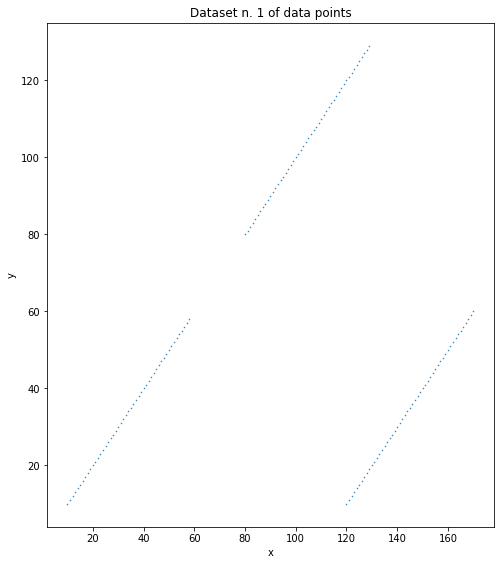

In [ ]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 1 of data points')

ax.set_xlabel(feature_names1[0])
ax.set_ylabel(feature_names1[1])

#plot the dataset
plt.plot(data1[:,0], data1[:,1], '.',markersize=1)

plt.show()

The following is the program for plotting the dataset n.2

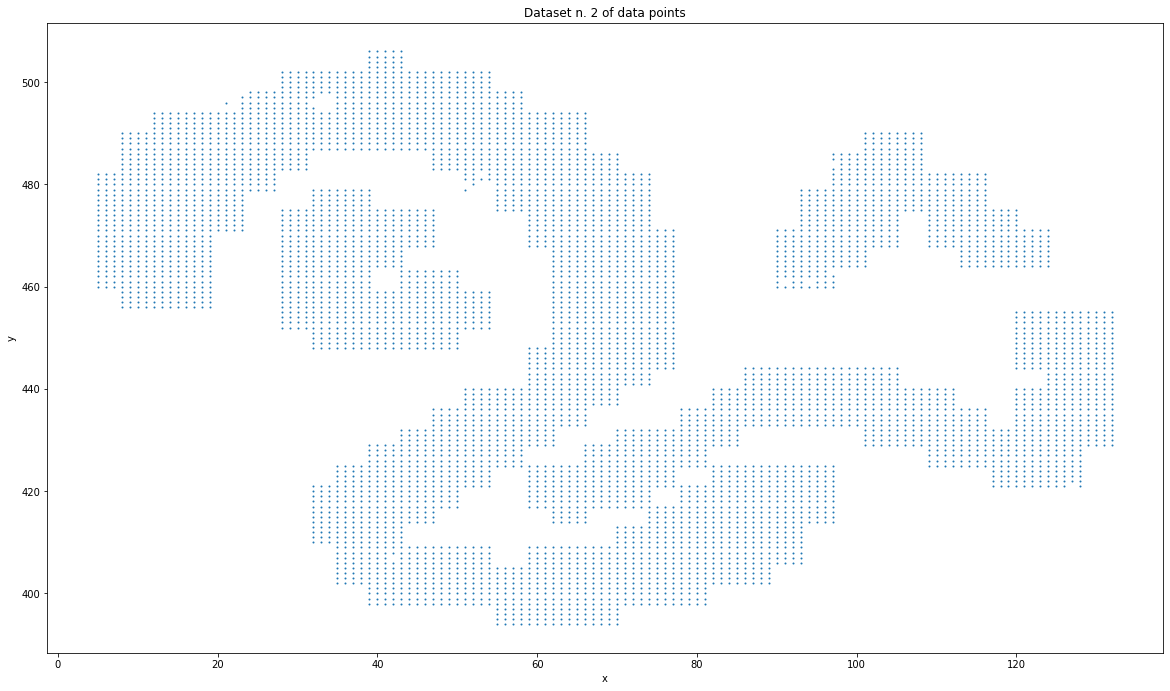

In [ ]:
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 2 of data points')

ax.set_xlabel(feature_names2[0])
ax.set_ylabel(feature_names2[1])

#plot the dataset
plt.plot(data2[:,0], data2[:,1], '.', markersize=2)

plt.show()

The following is the program for plotting the dataset n.3

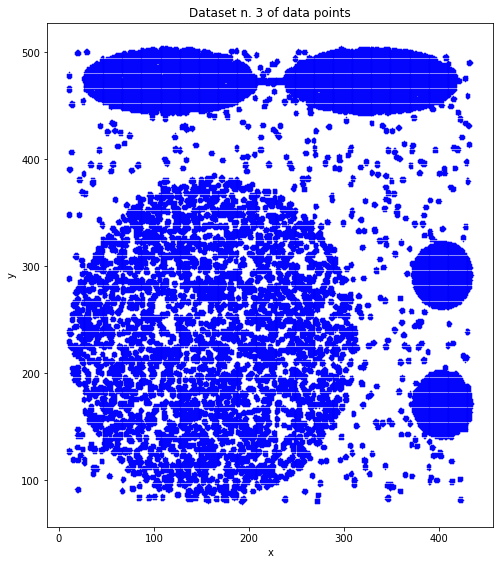

In [ ]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 3 of data points')

ax.set_xlabel(feature_names3[0])
ax.set_ylabel(feature_names3[1])

#plot the dataset
plt.plot(data3[:,0], data3[:,1], '.', markersize=1.2, markeredgecolor = 'blue')

plt.show()

## In the following program we cluster the dataset n.1 with K-means. 
From the plot of dataset n.1 we see 3 separated clusters. Thus k=3. 

In [ ]:

np.random.seed(5)
k: int = 3
kmeans1 = KMeans(n_clusters=k, random_state=0).fit(data1)

i: int=0
for i in range(n_samples1):
    print("Example n."+str(i)+"=("+str(data1[i,0])+","+str(data1[i,1])+")")
    print("in cluster n."+str(kmeans1.labels_[i]))

Example n.0=(10.0,10.0)
in cluster n.0
Example n.1=(11.0,11.0)
in cluster n.0
Example n.2=(12.0,12.0)
in cluster n.0
Example n.3=(13.0,13.0)
in cluster n.0
Example n.4=(14.0,14.0)
in cluster n.0
Example n.5=(15.0,15.0)
in cluster n.0
Example n.6=(16.0,16.0)
in cluster n.0
Example n.7=(17.0,17.0)
in cluster n.0
Example n.8=(18.0,18.0)
in cluster n.0
Example n.9=(19.0,19.0)
in cluster n.0
Example n.10=(20.0,20.0)
in cluster n.0
Example n.11=(21.0,21.0)
in cluster n.0
Example n.12=(22.0,22.0)
in cluster n.0
Example n.13=(23.0,23.0)
in cluster n.0
Example n.14=(24.0,24.0)
in cluster n.0
Example n.15=(25.0,25.0)
in cluster n.0
Example n.16=(26.0,26.0)
in cluster n.0
Example n.17=(27.0,27.0)
in cluster n.0
Example n.18=(28.0,28.0)
in cluster n.0
Example n.19=(29.0,29.0)
in cluster n.0
Example n.20=(30.0,30.0)
in cluster n.0
Example n.21=(31.0,31.0)
in cluster n.0
Example n.22=(32.0,32.0)
in cluster n.0
Example n.23=(33.0,33.0)
in cluster n.0
Example n.24=(34.0,34.0)
in cluster n.0
Example n.

In the following program we plot the clusters

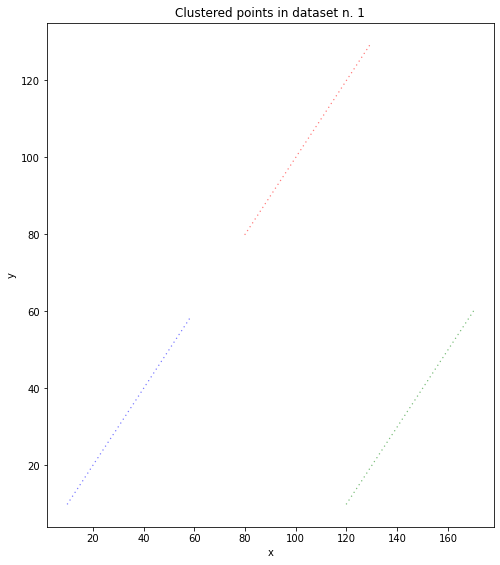

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Clustered points in dataset n. 1')

ax.set_xlabel('x')
ax.set_ylabel('y')

# set the list of colors to be selected when plotting the different clusters
color=['b','g','r','c','m','y','k','w']
    
#plot the dataset
for clu in range(k):
    # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
    data_list_x = [data1[i,0] for i in range(n_samples1) if kmeans1.labels_[i]==clu]
    data_list_y = [data1[i,1] for i in range(n_samples1) if kmeans1.labels_[i]==clu]
    plt.scatter(data_list_x, data_list_y, s=2, edgecolors='none', c=color[clu], alpha=0.5)

plt.show()

In the following cell I propose you to perform clustering with K-means on dataset2.

In [ ]:
k: int = 4
kmeans2 = KMeans(n_clusters=k, random_state=0, verbose=0)
y_predicted = kmeans2.fit_predict(data2)

In the following you have to plot clustering results on dataset2.

**Answer:** 
how do you explain what it happens?

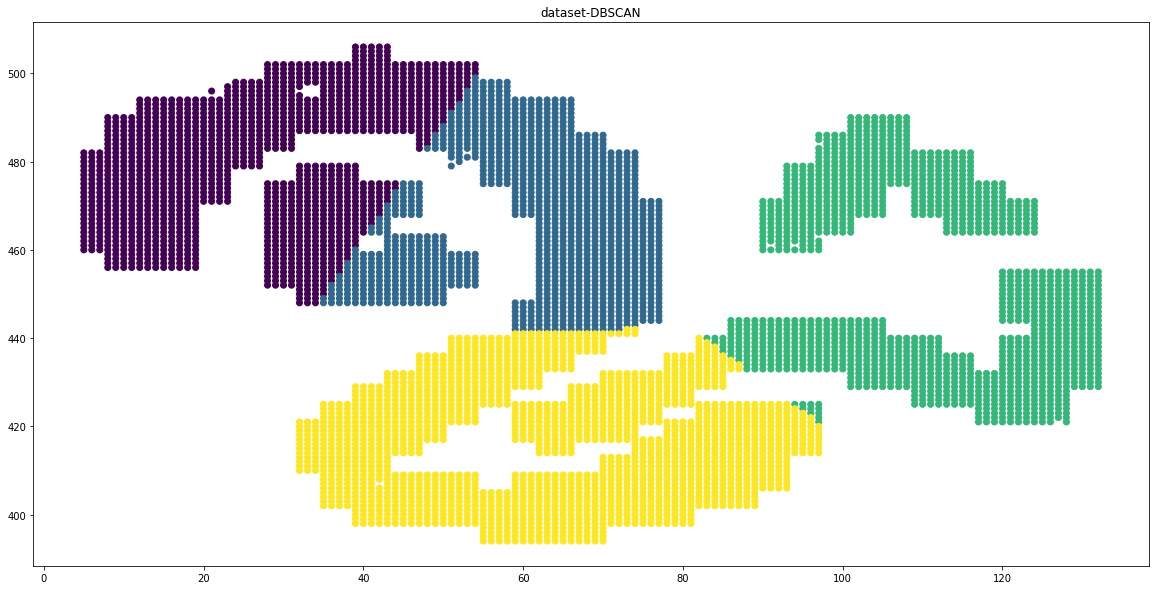

In [ ]:
fig = plt.figure(figsize=(20,10))
plt.scatter(data2[:, 0], data2[:, 1], c=y_predicted)
plt.title("dataset-DBSCAN")
fig.show()


In the following cell I propose you to perform clustering with K-means on the dataset3.

In [ ]:
k: int = 5
kmeans3 = KMeans(n_clusters=k, random_state=0, verbose=0, algorithm="elkan")
y_predicted_3 = kmeans2.fit_predict(data3)

In the following cell, I propose you to plot clustering results on dataset3.

**Answer:** 
how do you explain what it happens?

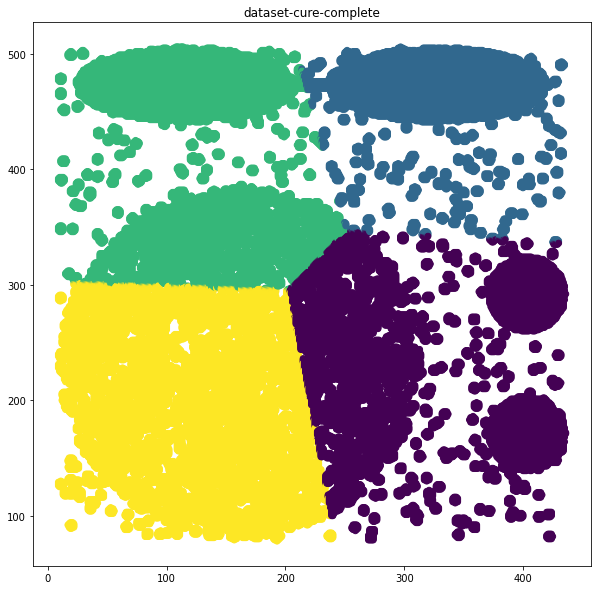

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.scatter(data3[:, 0], data3[:, 1], c=y_predicted_3)
plt.title("dataset-cure-complete")
fig.show()

In the following cells I propose you to write a program that computes with a statistical measure of your choice a quantitative evaluation of clusters in the three datasets.

**Note:**
It is advisable to execute K-means a certain number of times (let us try 10 times) and then select the clustering solution that gives the best value of the evaluation measure.

In [ ]:
# function returns WSS score for k values from 1 to kmax
def calculate_WSS(points, kmax):
    sse = []
    for k in range(1, kmax+1):
        kmeans = KMeans(n_clusters = k).fit(points)
        centroids = kmeans.cluster_centers_
        pred_clusters = kmeans.predict(points)
        curr_sse = 0

        # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
        for i in range(len(points)):
            curr_center = centroids[pred_clusters[i]]
            curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2

        # append the computed sse to the result
        sse.append(curr_sse)
    return sse

In [ ]:
def silhouette_analysis(X, range_n_clusters, s: str):

  store_score = dict()

  for n_clusters in range_n_clusters:
      # Create a subplot with 1 row and 2 columns
      fig, (ax1, ax2) = plt.subplots(1, 2)
      fig.set_size_inches(18, 7)

      # The 1st subplot is the silhouette plot
      # The silhouette coefficient can range from -1, 1 but in this context we
      # use -0.1,1
      ax1.set_xlim([-0.1, 1])
      # The (n_clusters+1)*10 is for inserting blank space between silhouette
      # plots of individual clusters, to demarcate them clearly.
      ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

      # Initialize the clusterer with n_clusters value and a random generator
      # seed of 10 for reproducibility.
      clusterer = KMeans(n_clusters=n_clusters, random_state=10, algorithm="elkan")
      cluster_labels = clusterer.fit_predict(X)

      # The silhouette_score gives the average value for all the samples.
      # This gives a perspective into the density and separation of the formed
      # clusters
      silhouette_avg = silhouette_score(X, cluster_labels)
      print("For n_clusters =", n_clusters,
            "The average silhouette_score is :", silhouette_avg)
      
      store_score[n_clusters] = silhouette_avg

      # Compute the silhouette scores for each sample
      sample_silhouette_values = silhouette_samples(X, cluster_labels)

      y_lower = 10
      for i in range(n_clusters):
          # Aggregate the silhouette scores for samples belonging to
          # cluster i, and sort them
          ith_cluster_silhouette_values = \
              sample_silhouette_values[cluster_labels == i]

          ith_cluster_silhouette_values.sort()

          size_cluster_i = ith_cluster_silhouette_values.shape[0]
          y_upper = y_lower + size_cluster_i

          color = cm.nipy_spectral(float(i) / n_clusters)
          ax1.fill_betweenx(np.arange(y_lower, y_upper),
                            0, ith_cluster_silhouette_values,
                            facecolor=color, edgecolor=color, alpha=0.7)

          # Label the silhouette plots with their cluster numbers at the middle
          ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

          # Compute the new y_lower for next plot
          y_lower = y_upper + 10  # 10 for the 0 samples

      ax1.set_title("The silhouette plot for the various clusters.")
      ax1.set_xlabel("The silhouette coefficient values")
      ax1.set_ylabel("Cluster label")

      # The vertical line for average silhouette score of all the values
      ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

      ax1.set_yticks([])  # Clear the yaxis labels / ticks
      ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

      # 2nd Plot showing the actual clusters formed
      colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
      ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                  c=colors, edgecolor='k')

      # Labeling the clusters
      centers = clusterer.cluster_centers_
      # Draw white circles at cluster centers
      ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                  c="white", alpha=1, s=200, edgecolor='k')

      for i, c in enumerate(centers):
          ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                      s=50, edgecolor='k')

      ax2.set_title("The visualization of the clustered data.")
      ax2.set_xlabel("Feature space for the 1st feature")
      ax2.set_ylabel("Feature space for the 2nd feature")

      plt.suptitle(("Silhouette analysis for KMeans clustering on " + s +
                    " with n_clusters = %d" % n_clusters),
                  fontsize=14, fontweight='bold')
      
  best_k = max(store_score, key=store_score.get)
  print("The best solution is with n_clusters = ", best_k)
  print("with score = ", store_score[best_k])


For n_clusters = 2 The average silhouette_score is : 0.5651096232579514
For n_clusters = 3 The average silhouette_score is : 0.7229402453727759
For n_clusters = 4 The average silhouette_score is : 0.6824925173029859
For n_clusters = 5 The average silhouette_score is : 0.6372722940289592
For n_clusters = 6 The average silhouette_score is : 0.6113126050223654
The best solution is with n_clusters =  3
with score =  0.7229402453727759


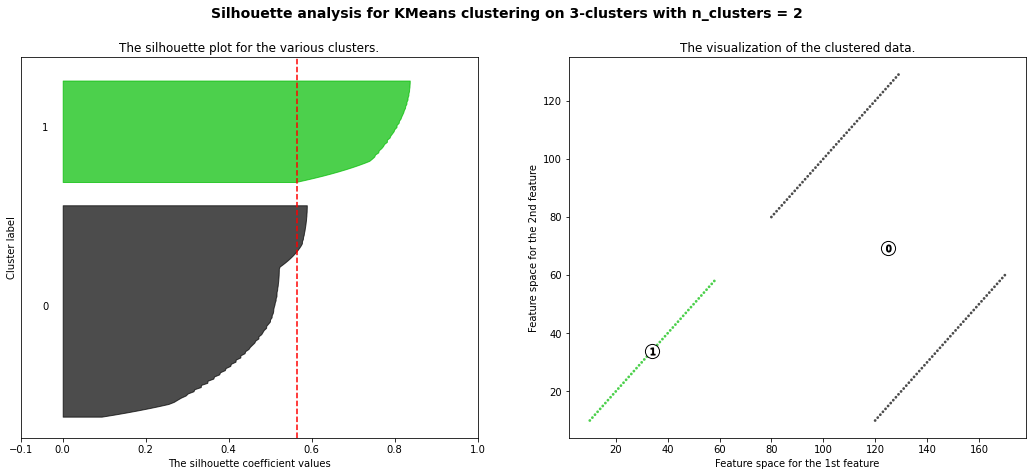

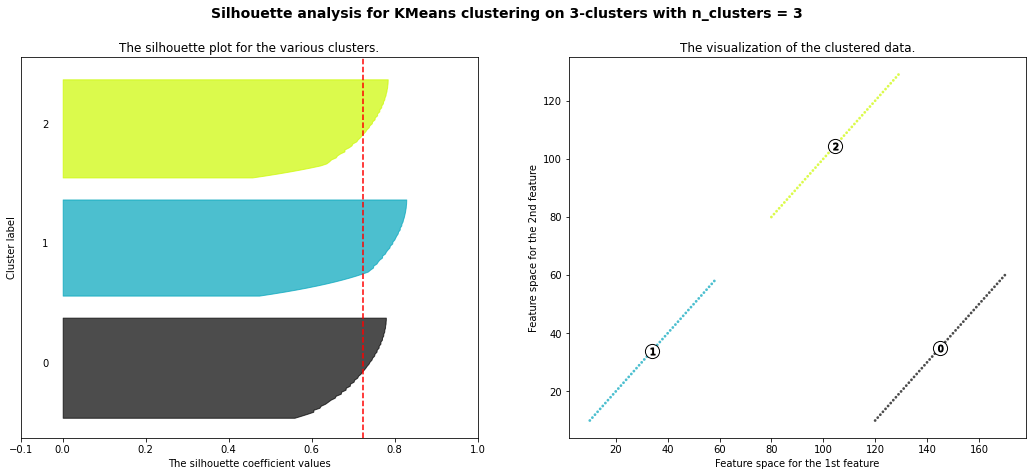

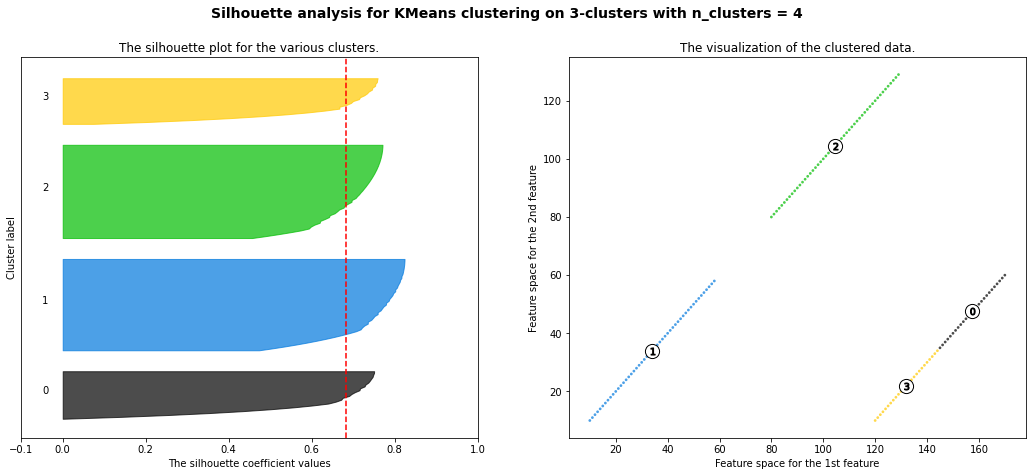

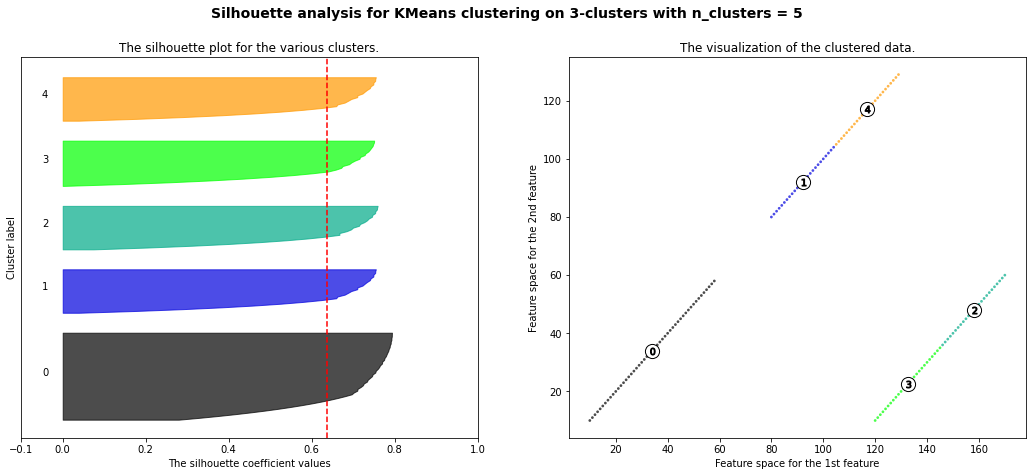

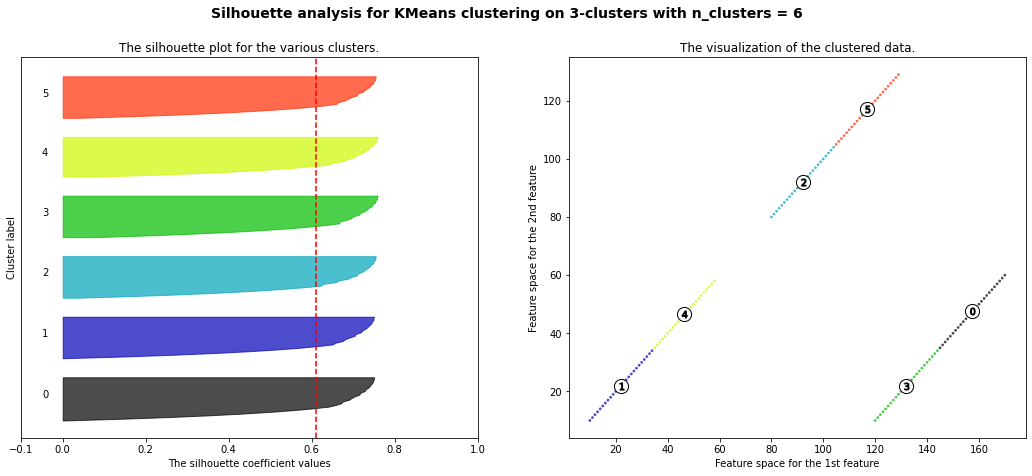

In [ ]:
# For data 3-cluster
name1 = file_name1[:-4]
silhouette_analysis(X = data1[:], range_n_clusters = [2, 3, 4, 5, 6], s = name1)

As already done with classification by k-nn, plot in the cell below the quantitative measure of your choice (used above) with respect to an increasing value of k (the number of clusters) so that the best value of k can be selected.

For n_clusters = 2 The average silhouette_score is : 0.43322366812579544
For n_clusters = 3 The average silhouette_score is : 0.4798655745488704
For n_clusters = 4 The average silhouette_score is : 0.4163374829558082
For n_clusters = 5 The average silhouette_score is : 0.42496965853475943
For n_clusters = 6 The average silhouette_score is : 0.410487879438627
For n_clusters = 7 The average silhouette_score is : 0.4334733111014723
For n_clusters = 8 The average silhouette_score is : 0.4453958151316269
The best solution is with n_clusters =  3
with score =  0.4798655745488704


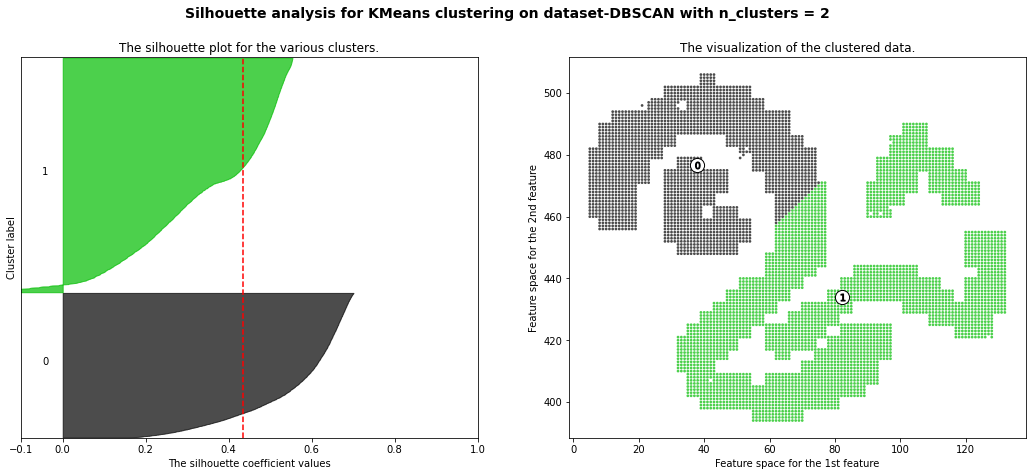

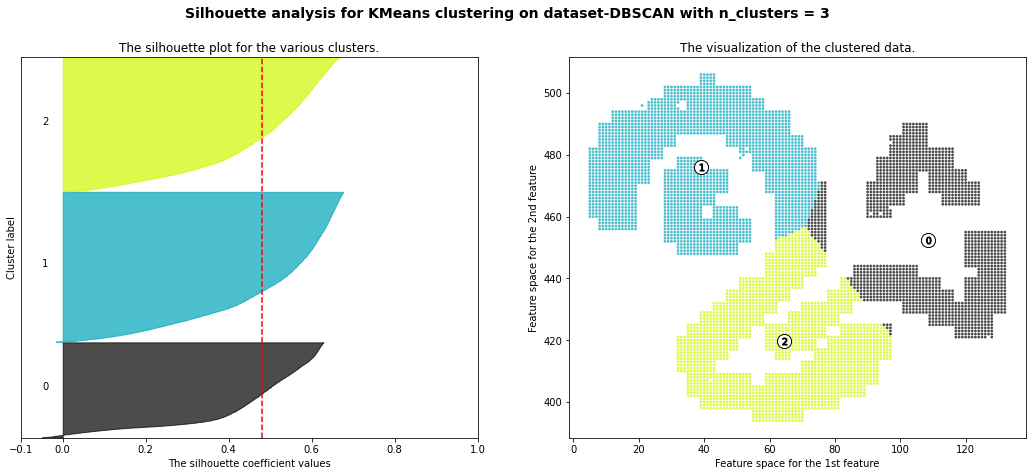

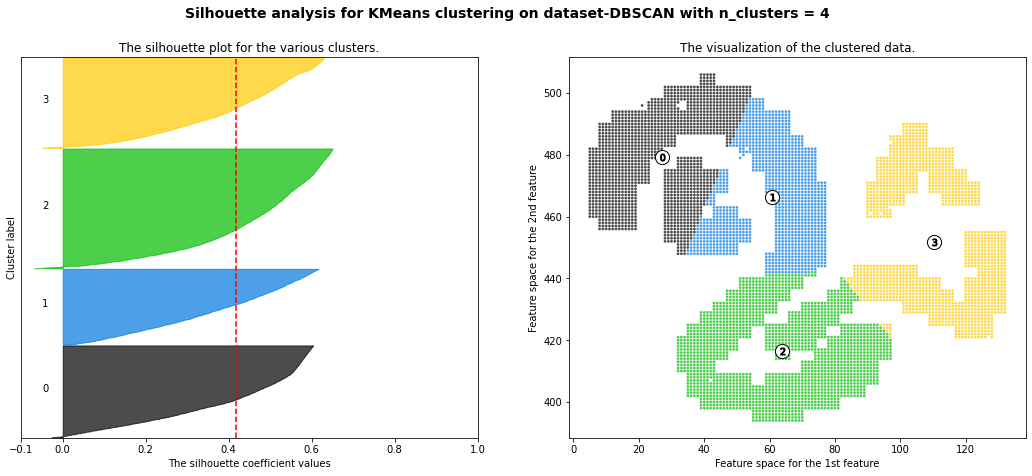

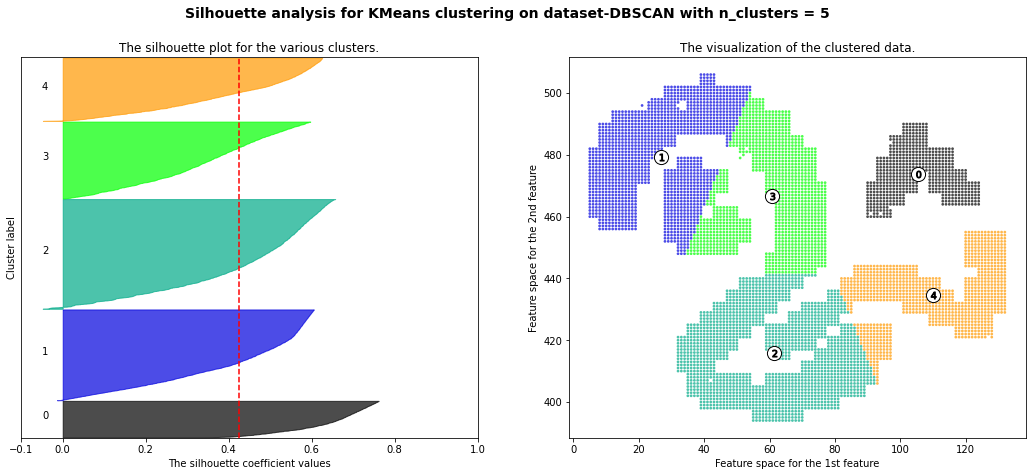

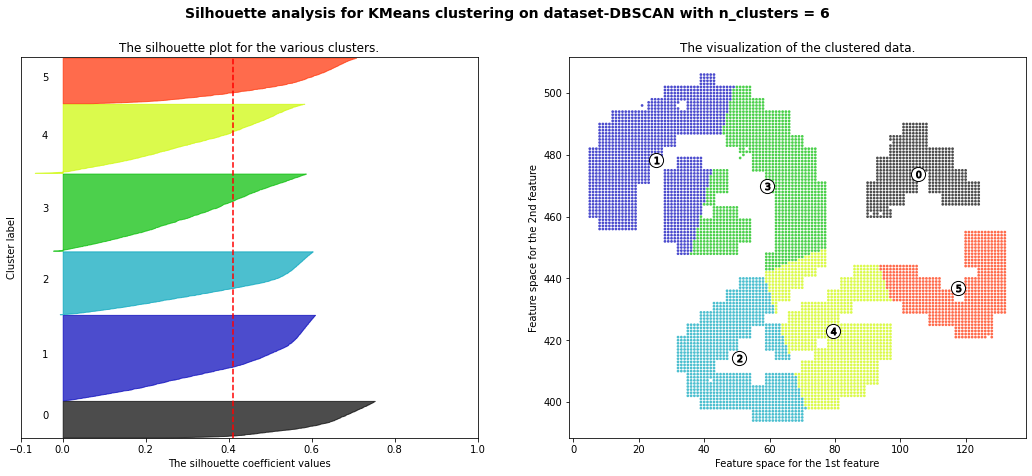

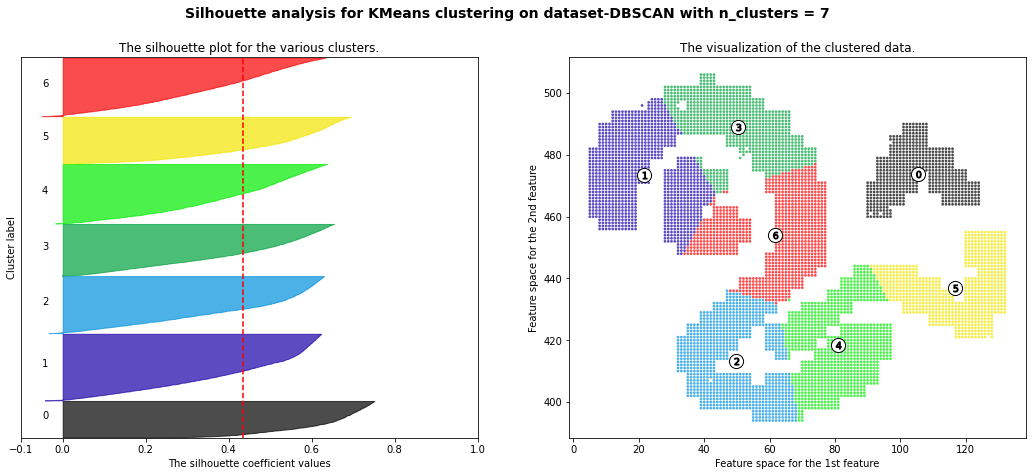

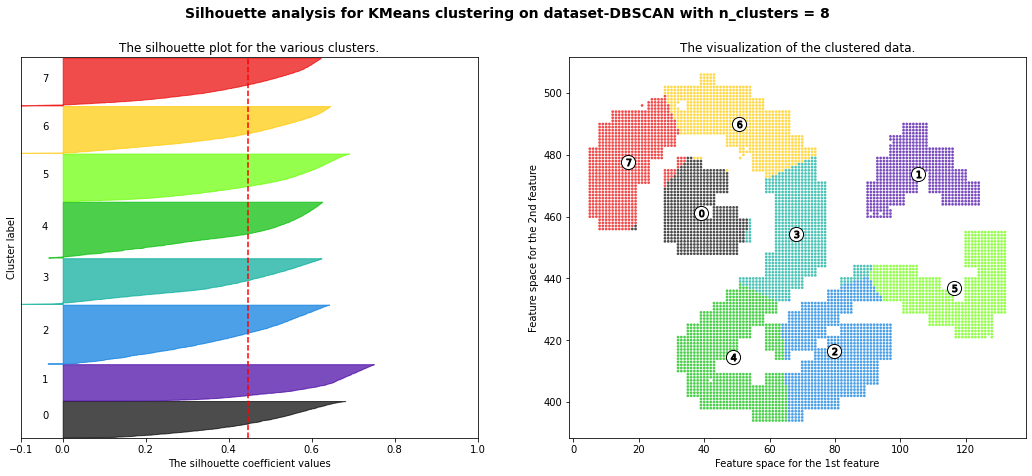

In [ ]:
# For dataset-DB-SCAN
name2 = file_name2[:-4]
silhouette_analysis(X = data2[:], range_n_clusters = [2, 3, 4, 5, 6, 7, 8], s = name2)

For n_clusters = 4 The average silhouette_score is : 0.40876490399939763
For n_clusters = 5 The average silhouette_score is : 0.41340590034335634
For n_clusters = 6 The average silhouette_score is : 0.428545642702252
For n_clusters = 7 The average silhouette_score is : 0.425996341647972
For n_clusters = 8 The average silhouette_score is : 0.42735200578489685
The best solution is with n_clusters =  6
with score =  0.428545642702252


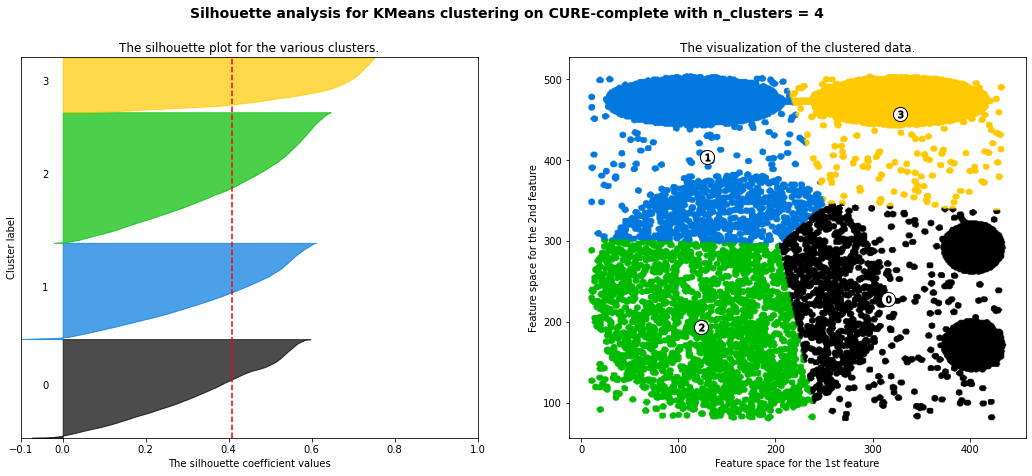

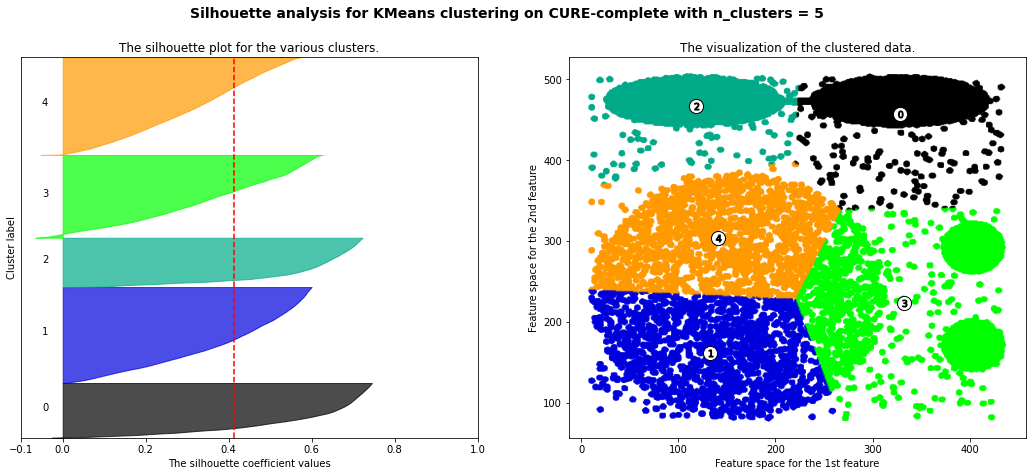

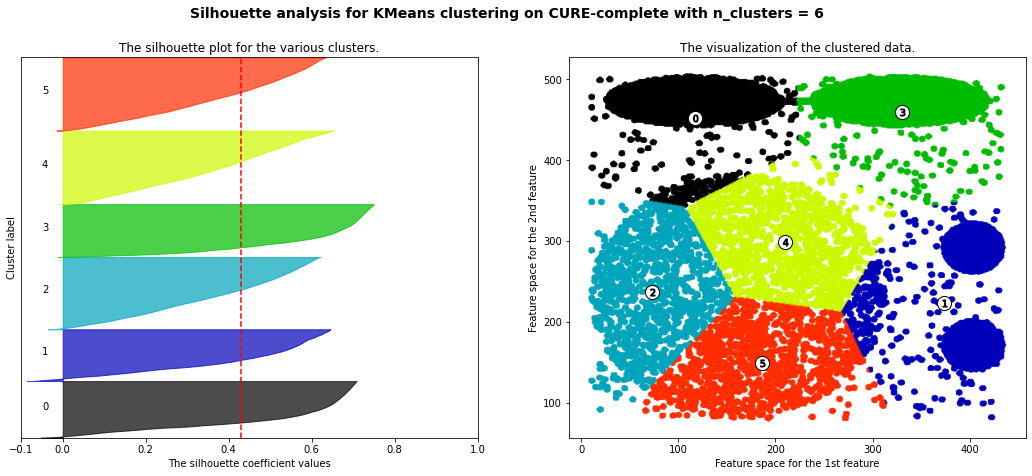

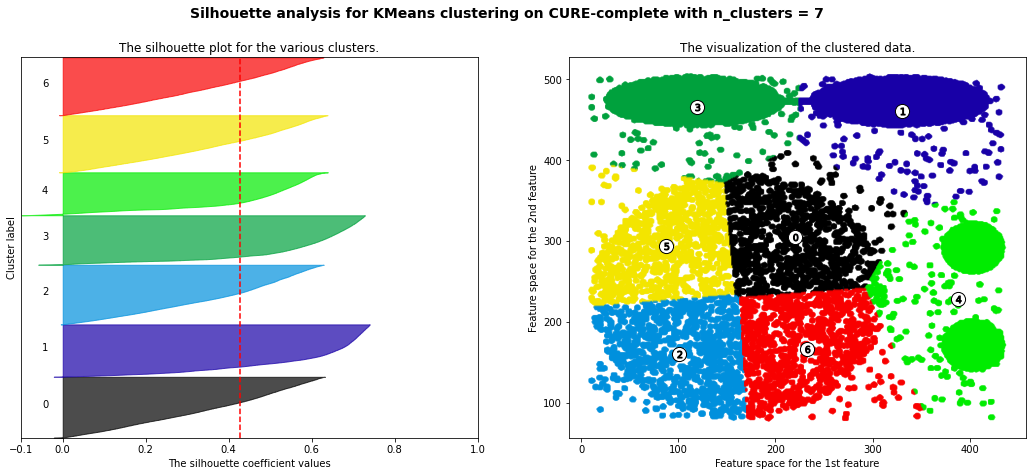

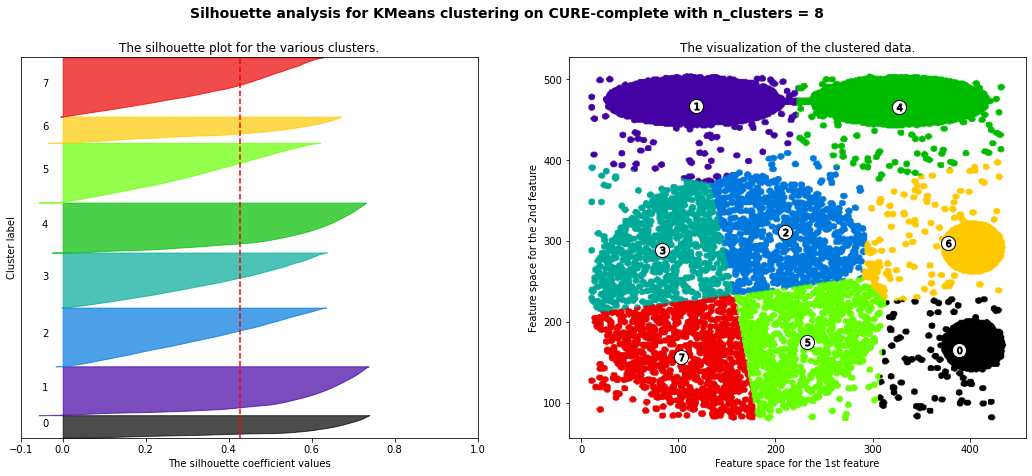

In [ ]:
# For CURE-complete
name3 = file_name3[:-4]
silhouette_analysis(X = data3[:], range_n_clusters = [4, 5, 6, 7, 8], s = name3)

In the following cell I propose you to run DBSCAN, instead, on one of the last two datasets: either dataset2 or dataset3. 

At the beginning try using a pair of Minpts and Eps of your choice.

**Note:**
If the data is too big, **sample it random, using a factor of 0.1.**

In [225]:
def compute_DBSCAN(X, eps, minpts):
  # Compute DBSCAN for DBSCAN
  db = DBSCAN(eps=eps, min_samples=minpts).fit(X)
  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_

  # Number of clusters in labels, ignoring noise if present.
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_noise_ = list(labels).count(-1)

  return (core_samples_mask, labels, n_clusters_, n_noise_)

In [ ]:
# Plot result
def plot_DBSCAN_result(X, labels, core_samples_mask):
  fig = plt.figure(figsize=(15,10))
  # Black removed and is used for noise instead.
  unique_labels = set(labels)
  colors = [plt.cm.Spectral(each)
            for each in np.linspace(0, 1, len(unique_labels))]
  for k, col in zip(unique_labels, colors):
      if k == -1:
          # Black used for noise.
          col = [0, 0, 0, 1]

      class_member_mask = (labels == k)

      xy = X[class_member_mask & core_samples_mask]
      plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
              markeredgecolor='k', markersize=14)

      xy = X[class_member_mask & ~core_samples_mask]
      plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
              markeredgecolor='k', markersize=6)
  
  plt.title('Estimated number of clusters: %d' % n_clusters_)
  plt.show()

In [ ]:
# Metrics for DBSCAN (silhouette is too heavy for CURE)
def metrics_DBSCAN(n_clusters_, n_noise_, X):
  print('Estimated number of clusters: %d' % n_clusters_)
  print('Estimated number of noise points: %d' % n_noise_)
  print("Homogeneity: %0.3f" % metrics.homogeneity_score(X[:,1], labels))
  #print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))


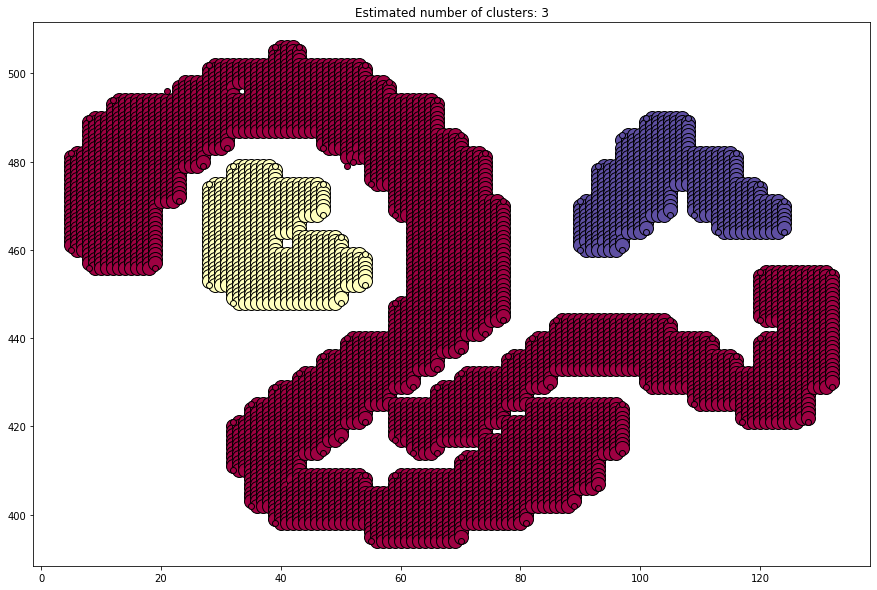

Estimated number of clusters: 3
Estimated number of noise points: 0
Homogeneity: 0.056


In [157]:
# dataset-DBSCAN
data = data2
core_samples_mask, labels, n_clusters_, n_noise_ = compute_DBSCAN(X=data, eps=2.4, minpts=10)
plot_DBSCAN_result(data, labels, core_samples_mask)
metrics_DBSCAN(n_clusters_, n_noise_, data)

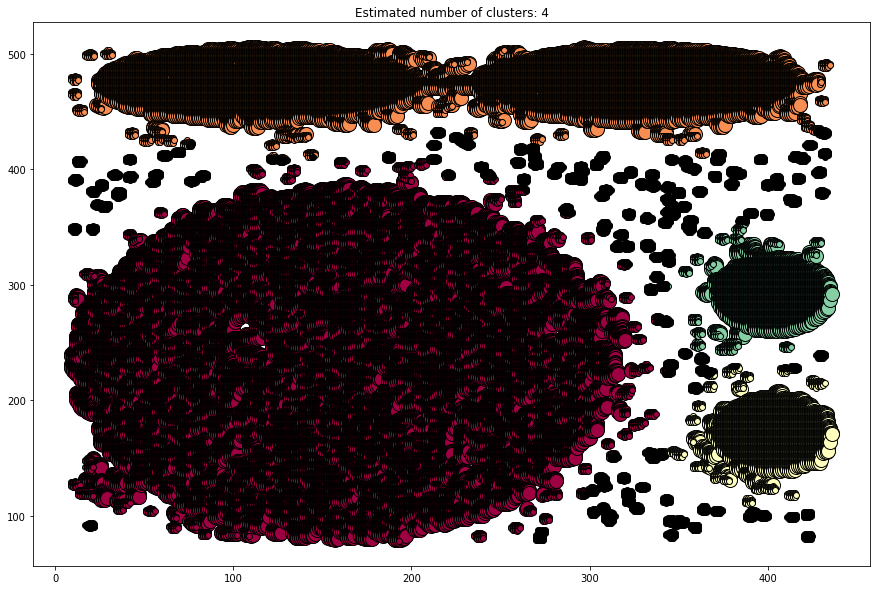

Estimated number of clusters: 4
Estimated number of noise points: 3727
Homogeneity: 0.122


In [226]:
# dataset-CURE
data = data3
core_samples_mask, labels, n_clusters_, n_noise_ = compute_DBSCAN(X=data, eps=20, minpts=300) 
plot_DBSCAN_result(data, labels, core_samples_mask)
metrics_DBSCAN(n_clusters_, n_noise_, data)

In the following cell I propose you to: 

1.   Set *Minpts* to a number (say **10**).
2.   Compute the **reachability distance** of the **10-th nearest neighbour ** for each data-point.
3. Sort the set of reachability distances you obtained in an increasing way.
4. Plot the sorted reachability distances
5. Find the **elbow** of the diagram => it gives the eps value combined with Minpts=10.
6. Try this combined pair of parameters on the dataset you chose, with DBSCAN.

In [188]:
minpts = 10
data = data2

minpts_th_dst = np.zeros(data.shape[0])
for k in range(data.shape[0]):
    mask = np.ones(data.shape[0], dtype=bool)
    mask[k] = 0
    points = data[mask]

    # The point where to calcuate distances
    X = np.array([data[k],])

    dists = np.sort(euclidean_distances(X, points).reshape(-1))
    minpts_th_dst[k] = dists[minpts - 1]

# Sort the set of reachability distances you obtained in an increasing way.
minpts_th_dst = np.sort(minpts_th_dst)

# 987 for data 3 seconds DO NOT RUN

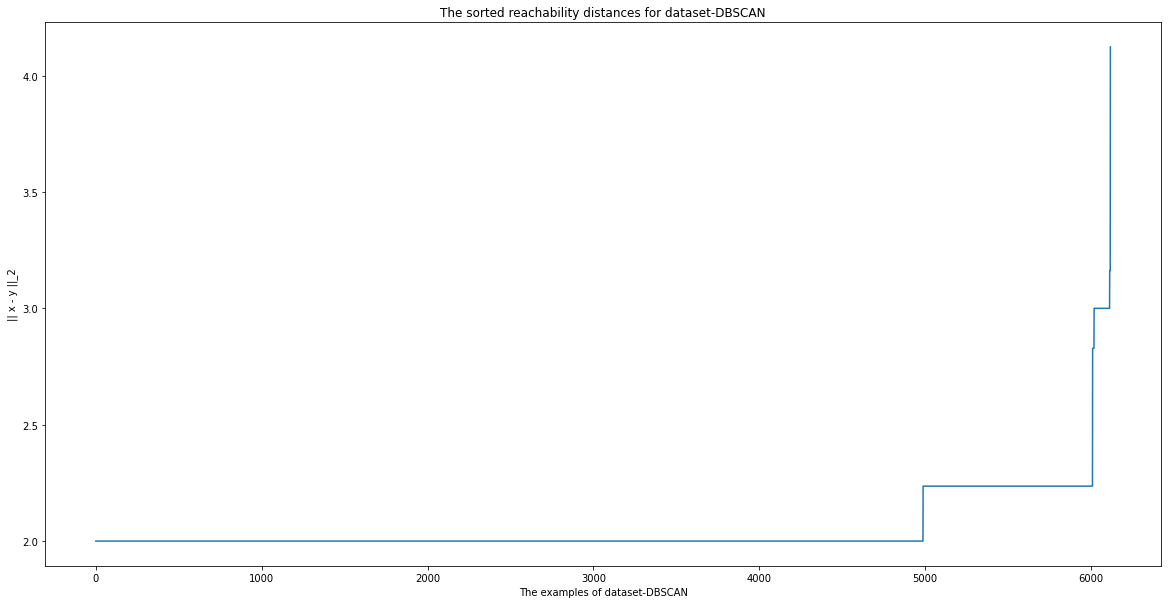

In [193]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111)

ax1.set_title("The sorted reachability distances for " + name2)
ax1.set_xlabel("The examples of " + name2)
ax1.set_ylabel("|| x - y ||_2")

ax1.plot(range(data.shape[0]), minpts_th_dst)

fig.show()

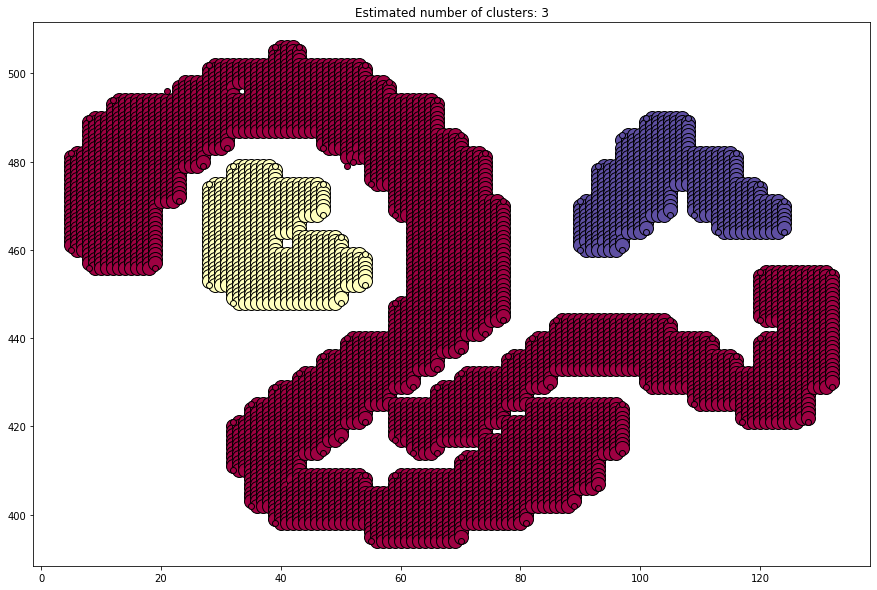

Estimated number of clusters: 3
Estimated number of noise points: 0
Homogeneity: 0.056


In [220]:
# Compute with new eps
eps = minpts_th_dst[5900]

core_samples_mask, labels, n_clusters_, n_noise_ = compute_DBSCAN(X=data2, eps=eps, minpts=10) 
plot_DBSCAN_result(data2, labels, core_samples_mask)
metrics_DBSCAN(n_clusters_, n_noise_, data2)

In [200]:
data = data3

minpts_th_dst_data3 = np.zeros(data.shape[0])
for k in range(data.shape[0]):
    mask = np.ones(data.shape[0], dtype=bool)
    mask[k] = 0
    points = data[mask]

    # The point where to calcuate distances
    X = np.array([data[k],])

    dists = np.sort(euclidean_distances(X, points).reshape(-1))
    minpts_th_dst_data3[k] = dists[minpts - 1]

# Sort the set of reachability distances you obtained in an increasing way.
minpts_th_dst_data3 = np.sort(minpts_th_dst_data3)

minpts_th_dst_data3.shape

(86558,)

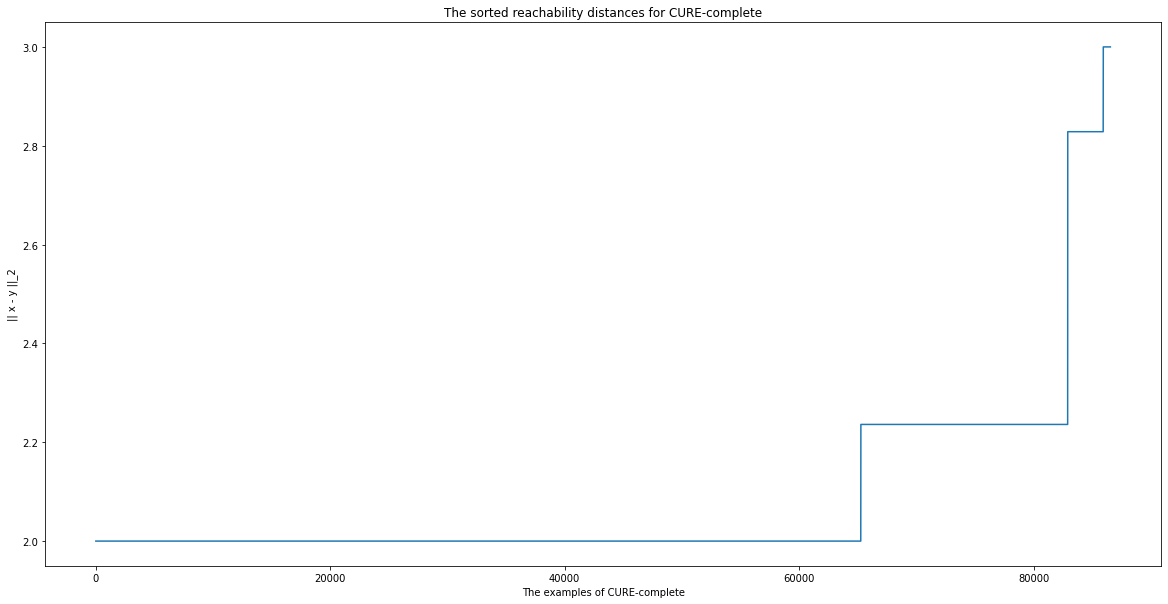

In [227]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111)

ax1.set_title("The sorted reachability distances for " + name3)
ax1.set_xlabel("The examples of " + name3)
ax1.set_ylabel("|| x - y ||_2")

ax1.plot(range(data3.shape[0]), minpts_th_dst_data3)

fig.show()

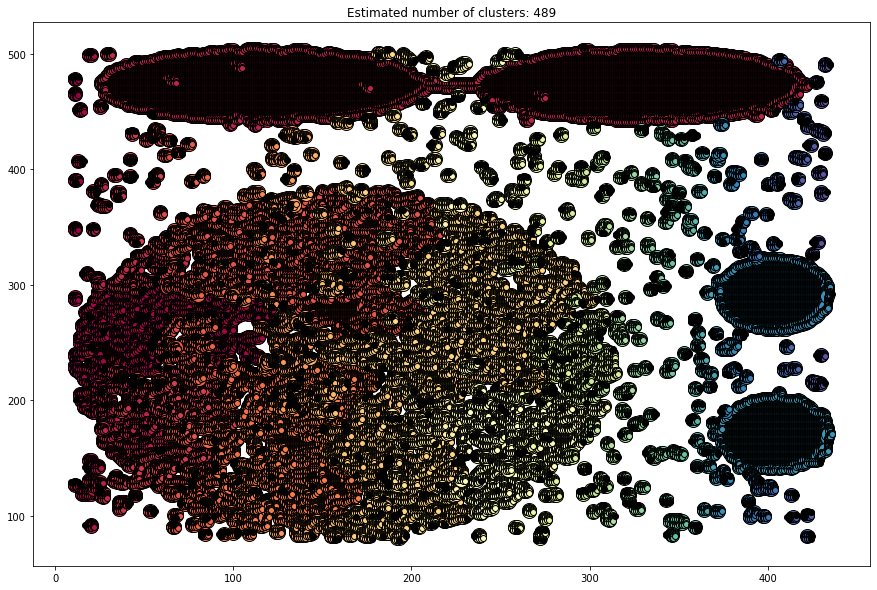

Estimated number of clusters: 489
Estimated number of noise points: 1099
Homogeneity: 0.343


In [219]:
# Compute with new eps
eps = minpts_th_dst_data3[81000]

core_samples_mask, labels, n_clusters_, n_noise_ = compute_DBSCAN(X=data3, eps=eps, minpts=20) 
plot_DBSCAN_result(data3, labels, core_samples_mask)
metrics_DBSCAN(n_clusters_, n_noise_, data3)